# Takes in a dataset and num of bins, returns a histogram visualization (Matplotlib object) showing the histogram


### IMPORT STATEMENTS AND DATASET INSTANTIATION

In [1]:
# Using pandas & numpy
# get titanic dataframe

import pandas as pd
import numpy as np

PATH = "../Notebooks - Class/Datasets/titanic.csv" 

df = pd.read_csv(PATH)

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


No data cleaning or processing required.

---

## Custom Histogram Function

## Data Cleaning

1. Dropping null values
2. Rounding float values to ceiling integers
3. Casting all floats to integers
4. (OPTIONAL) Sort our integers

In [3]:
# 1: Dropping Null Values
ages = df["Age"].dropna()

# 2. Rounding Floats to Ceiling Integers
# 3. Casting All Floats to Integers
def round_up(age):
    """ Function that rounds an individual float up to its ceiling and casts it to an integer value. """
    return int(np.ceil(age))

# 4. Sort our integers (and kind of 2. and 3.)
ages = sorted(list(map(round_up, ages)))

Get range of age data.

In [4]:
np.min(ages), np.max(ages)

(1, 80)

### OBJECTIVES:

1. Create a function that takes in two inputs: `dataset` and `bins`. 
    1.1. Cast three arguments to function: `dataset`, `feature`, and `bins`. 
    
2. Within our function, create a histogram object that splits the range of our *target feature* (column) into `n` number of uniform bins/buckets based on our `bins` argument. 

NOTE: Example of above is if you have data representing ages from 1 to 100 and you pass it 10 bins, I expect to get the first bin containing ages from 1-10, the second bin containing ages from 11-20, the third bin containing ages from 21-30, etc. 

NOTE: Example of above is if you have data representing ages from 1 to 100 and you pass it 5 bins, I expect to get the first bin containing ages from 1-20, the second bin containing ages from 21-40, etc. 

3. Cast binned histogram object to MatPlotLib/Seaborn for visualization. 

In [5]:
# STRETCH CHALLENGE: Step 1.1: Cast three arguments to function: `dataset`, `feature`, and `bins`. 
custom_binned_frequency_histogram(df, "Fare", bins=20)

NameError: name 'custom_binned_frequency_histogram' is not defined

In [51]:
def custom_binned_frequency_histogram(dataset, feature, bins):
    # Create object to hold ranges of buckets
    buckets = []

    """ STRETCH CHALLENGE: Create custom cleaning function and call here based on `dataset` and `feature` args
    and return individual dataset (e.g. ages). """
    # CUSTOM CODE GOES HERE!

    """ We need to access our data's minimum and maximum values, and have a step size 
    to move across our range and iteratively create our buckets based on our number of bins. """
    STEP = int(np.max(dataset) / bins)
    floor, ceiling = np.min(dataset), np.min(dataset) + STEP

    """ We need to use our STEPs to increment over our data's range and create subranges of buckets. 
    This will contain the ranges of data that are attributed to each individual bucket for our histogram. """
    for position in range(bins):
        current_bucket = range(floor, ceiling)
        buckets.append(current_bucket)
        floor += STEP; ceiling += STEP

    """ We need to cast our data into our bucketed histogram by frequency.
    This may require altering our final histogram object. """
    # Recast Buckets to New Histogram Object: Dictogram
    frequency_dict = dict((bucket, 0) for bucket in buckets)

    # Loop through ages and buckets and cast ages to buckets in histogram
    for age in dataset:
        for bucket in buckets:
            if age in bucket:
                frequency_dict[bucket] += 1

    """ We need to send our frequency histogram to a MatPlotLib object to visualize. """
    # Instantiate plotting space in Jupyter Notebook
    plt.figure(figsize=(15, 10))

    # Produce bar chart (histogram) of frequency histogram data.
    plt.bar(np.arange(bins), frequency_dict.values())

    # Rename X-ticks to Bucket Ranges
    plt.xticks(np.arange(bins), frequency_dict.keys())

    # Display our MatPlotLib visualization.
    plt.show()

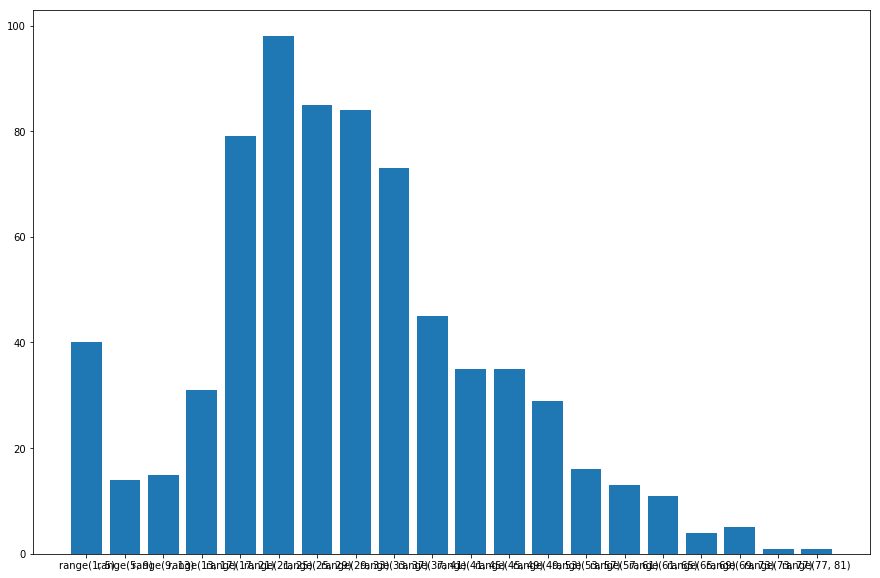

In [53]:
custom_binned_frequency_histogram(ages, bins=20)

## Q2: How we can plot histogram of Age for female and male with legend?  

Use Pandas with .groupby method and plot the following 

Sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

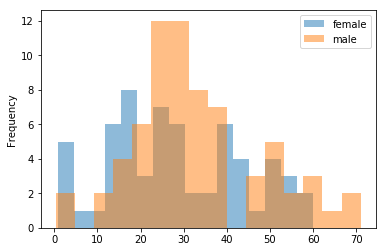